1. What is inductive reasoning? Deductive reasoning? Give an example of each, different from the examples given in class.

Inductive reasoning is generalizations based on specifc observations and some examples are i go to sleep every night around 9pm which is based on checking the time everytime i fall asleep and the clock is around 9pm.  Deductive reasoning is specific conclusion based on things that seem to be true and an example would be all kids are required to go to public school, hannah is 10 so she has to go to public school.

2. Preprocess your dataset. 

In [45]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [56]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
#X.replace(' ?', pd.NA, inplace=True)
#X.dropna(inplace=True)
#y=y.loc[X.index].copy()
X_encoded= pd.get_dummies(X,drop_first=True)


numerical_features= ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()
X_encoded[numerical_features] = scaler.fit_transform(X_encoded[numerical_features])

label_encoder= LabelEncoder()
y= label_encoder.fit_transform(y)

X_train, X_test, y_train,y_test = train_test_split(X_encoded,y, test_size=.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
X_encoded

(38096, 100)
(9525, 100)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.026501,-1.062924,1.132729,0.144629,-0.217456,-0.048943,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0.837781,-1.008031,1.132729,-0.145735,-0.217456,-2.251188,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,-0.047252,0.245517,-0.424726,-0.145735,-0.217456,-0.048943,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,1.059039,0.426206,-1.203454,-0.145735,-0.217456,-0.048943,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,-0.784780,1.408394,1.132729,-0.145735,-0.217456,-0.048943,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,-0.416016,0.525573,1.132729,-0.145735,-0.217456,-0.048943,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
48837,0.026501,0.243367,1.132729,-0.145735,-0.217456,-0.375201,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
48839,-0.047252,1.754843,1.132729,-0.145735,-0.217456,0.766703,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
48840,0.395264,-1.002537,1.132729,0.582847,-0.217456,-0.048943,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


3. Create a decision tree model tuned to the best of your abilities. Explain how you tuned it.

In [52]:
from sklearn import tree
model =tree.DecisionTreeClassifier(max_depth=7, random_state=42)


In [53]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [59]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.95      0.73      4924
           1       0.24      0.00      0.01      2246
           2       0.56      0.51      0.53      1617
           3       0.30      0.03      0.05       738

    accuracy                           0.58      9525
   macro avg       0.42      0.37      0.33      9525
weighted avg       0.48      0.58      0.47      9525



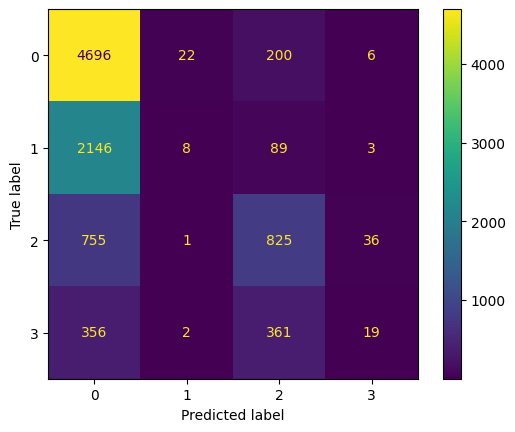

In [61]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

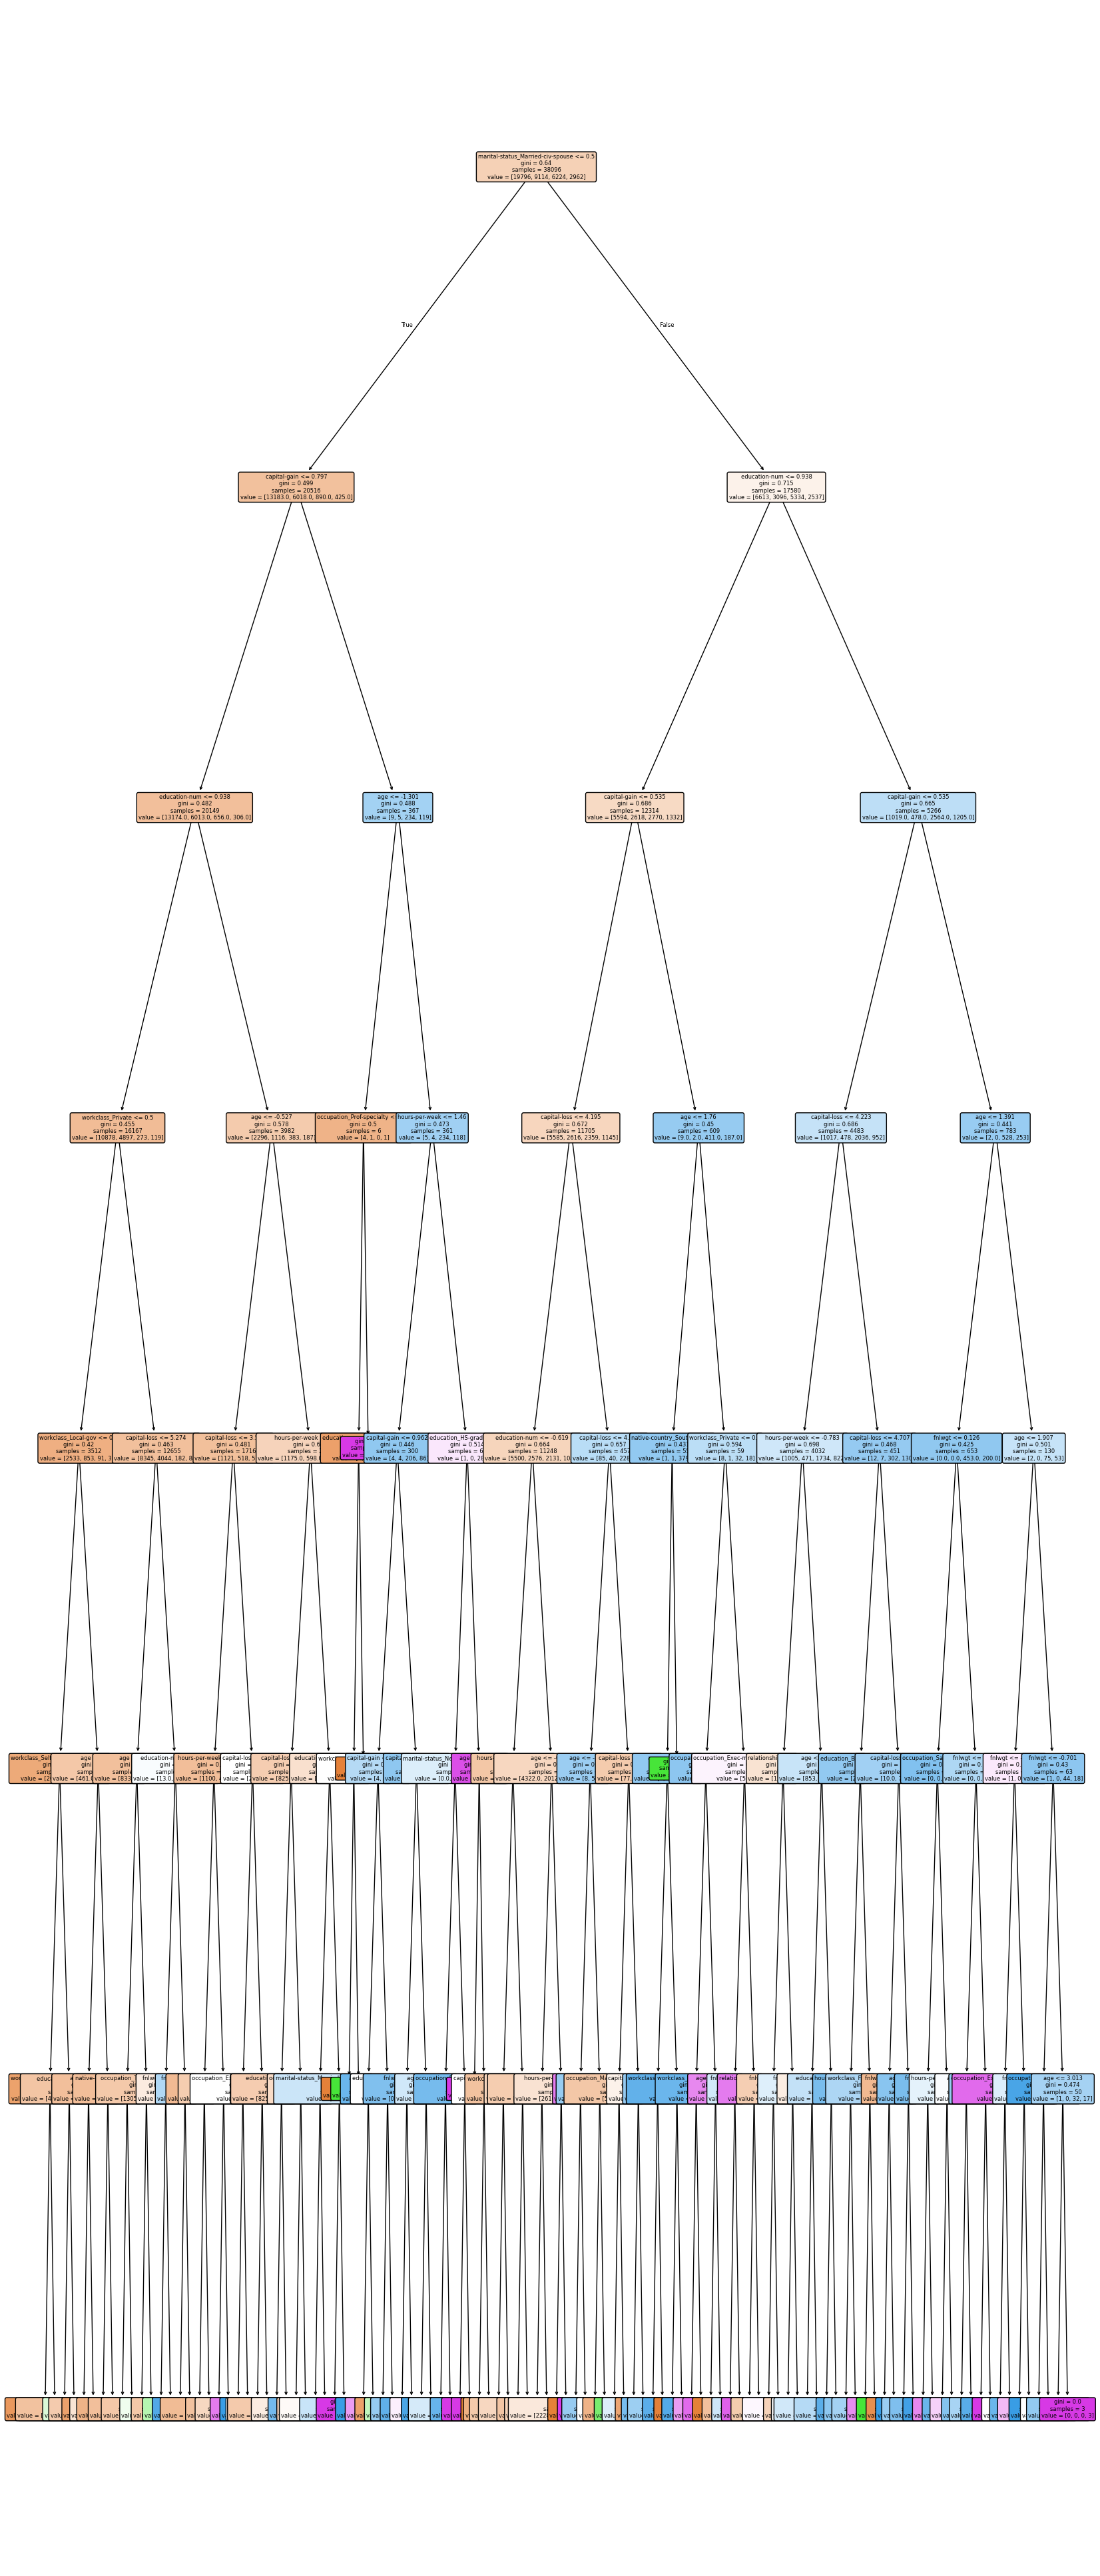

In [90]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree

param_grid = {'max_depth': [None,10, 20, 30, 40],
              'min_samples_leaf': [1, 4, 10]}

decision_tree=DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_score=grid_search.best_score_
best_model=grid_search.best_estimator_
plt.figure(figsize=(20,50))
plot_tree(model, feature_names=list(X_train.columns),
               filled=True, fontsize=6, rounded=True)

plt.show()

i tuned this model by doing a parameter tune and gridsearch to find the hyperparameters and trian the data.  It may not be the best and it took me a while and i still dont understadn but its something. 

4. Create a random forest model tuned to the best of your abilities. Explain how you tuned it.

In [78]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth':[None,10,20,30],
    'min_samples_leaf':[1,4,10]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_rf=grid_search.best_estimator_
score = best_rf.score(X_test,y_test)

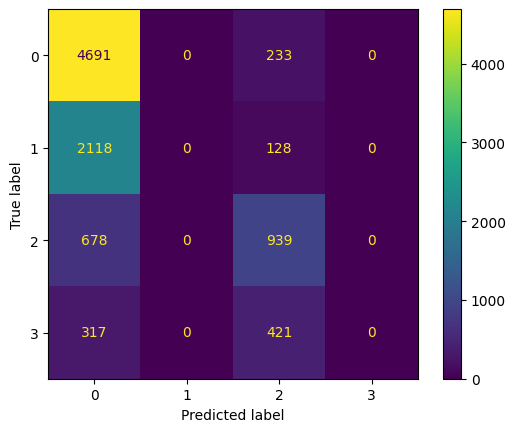

In [79]:
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test)

In [81]:
print(best_rf.feature_importances_, X_train.columns)

[1.00999312e-01 8.47852065e-02 8.81242008e-02 1.17275326e-01
 3.38808726e-02 6.74542164e-02 4.81471646e-03 6.59413098e-03
 1.49270363e-06 1.56591655e-02 6.42487366e-03 9.21030472e-03
 5.01520929e-03 9.50432742e-06 3.47096872e-03 1.20629824e-03
 5.12258516e-04 1.21159975e-03 2.68767155e-03 1.65605218e-03
 2.98694998e-03 3.49282698e-03 1.57647936e-02 4.96243071e-03
 9.74967995e-03 1.04180096e-02 1.62192337e-04 6.55033367e-03
 7.55241160e-03 1.98907807e-04 1.08424995e-01 1.26767429e-03
 4.49179142e-02 3.13880830e-03 2.64713691e-03 7.57089806e-03
 1.12638602e-05 7.06298561e-03 2.50503409e-02 5.30967777e-03
 4.06428877e-03 4.66720216e-03 1.06303338e-02 6.60113820e-04
 1.87003373e-02 2.77436131e-03 7.19618211e-03 5.46298374e-03
 3.98159204e-03 2.18067796e-02 2.91611973e-03 2.02680167e-02
 1.30358797e-02 9.86056027e-03 2.45141543e-03 5.22805757e-03
 8.88654933e-04 7.92026875e-03 2.37882063e-02 4.01645215e-06
 3.84510237e-04 2.89894105e-04 6.24123725e-05 1.83654165e-04
 2.22436157e-04 3.146666

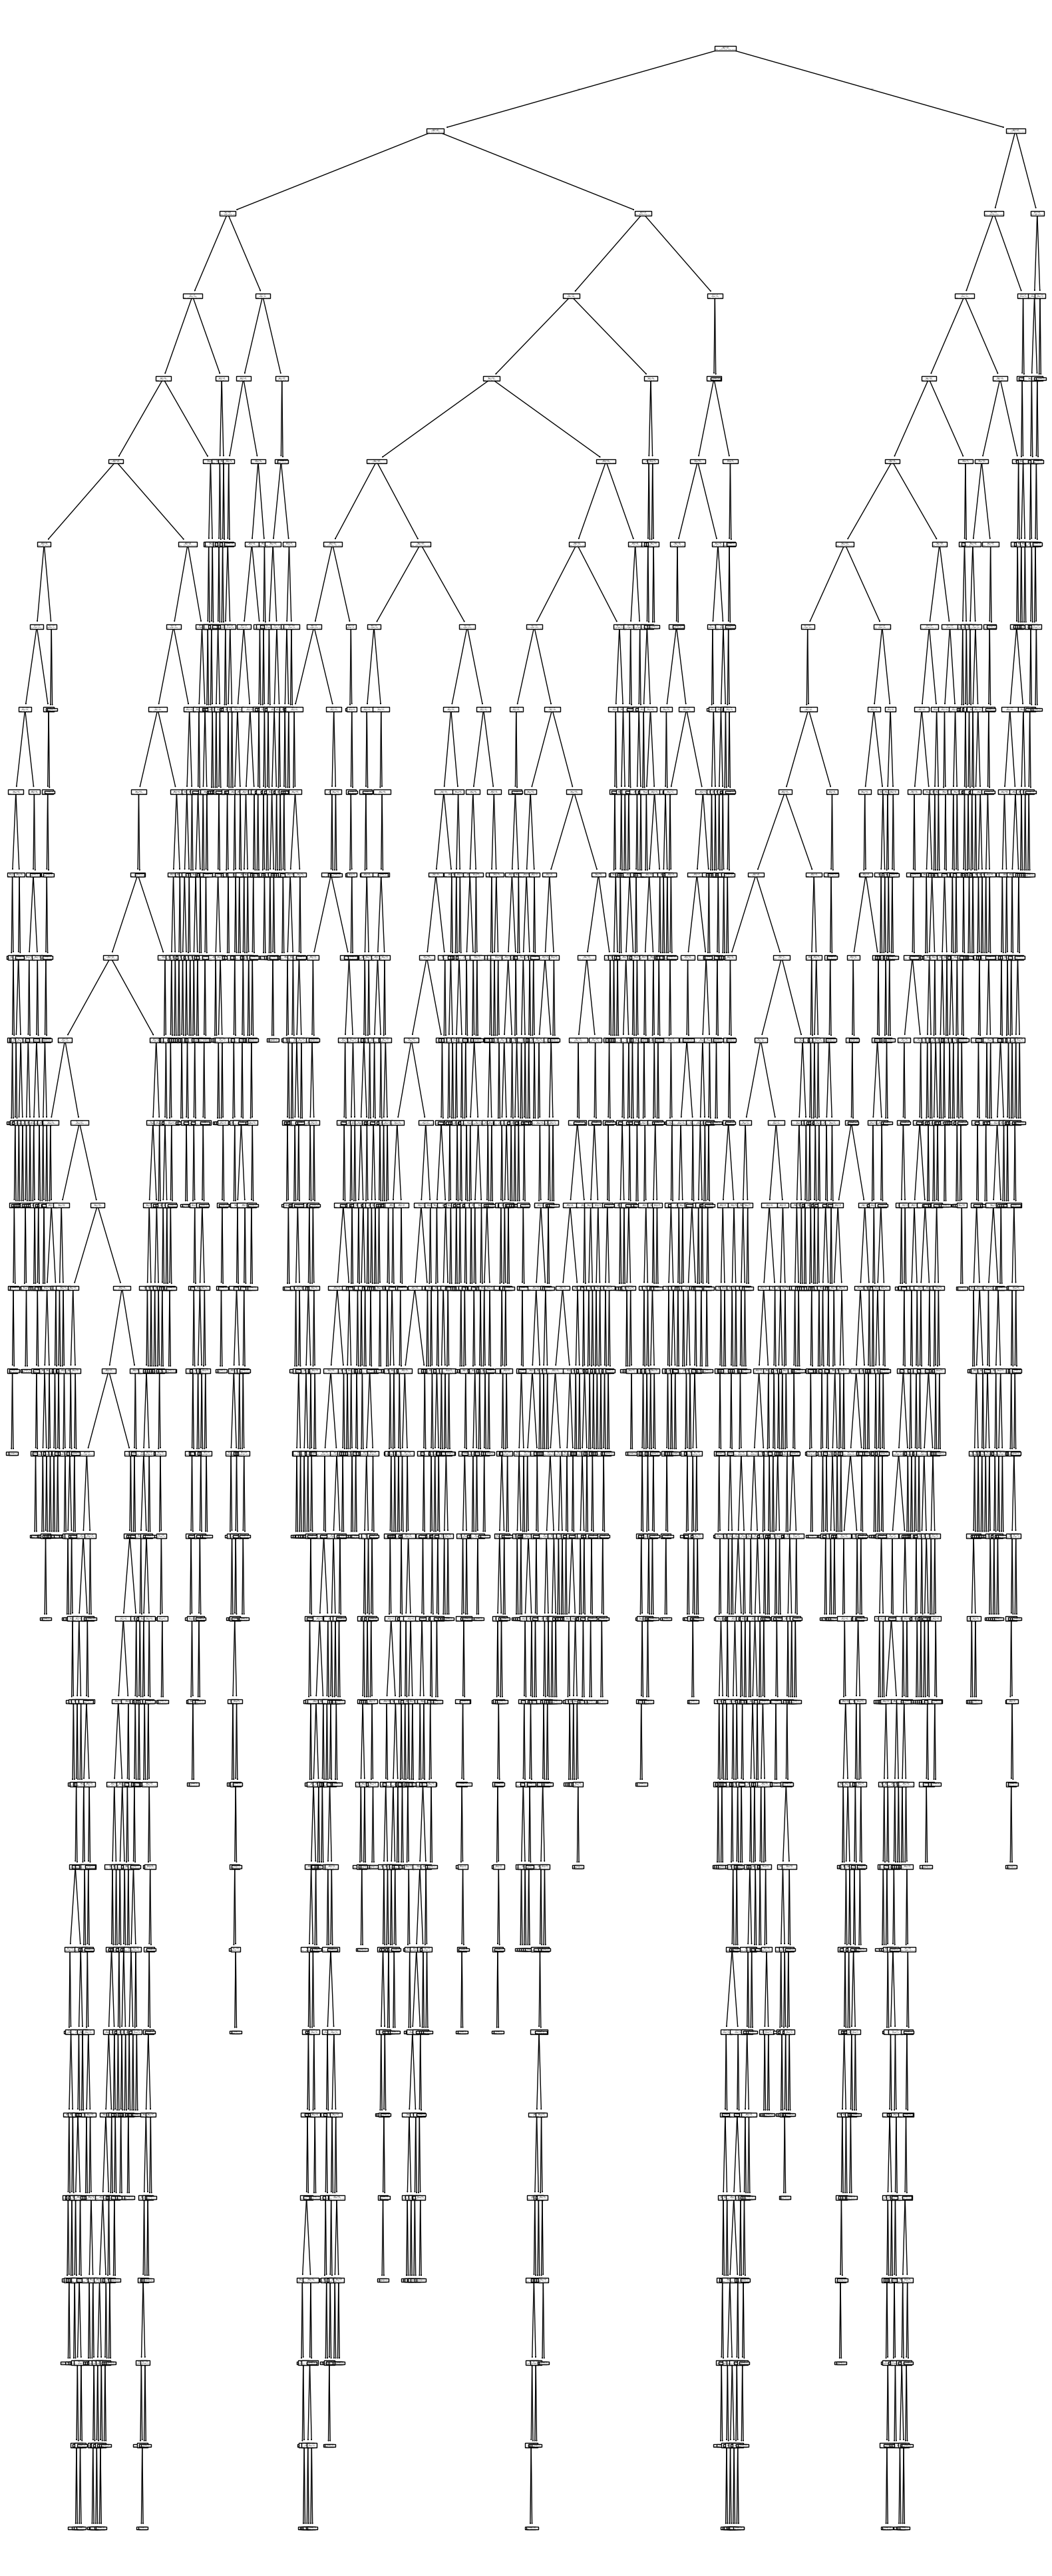

In [85]:
import matplotlib.pyplot as plt
rf_tree = best_rf.estimators_[4]
plt.figure(figsize=(20,50))
plot_tree(rf_tree)
plt.savefig("rf_tree.svg")

i did the same in this one too by doing a parameter and grid search which the parameter affected the visual plot and the grisd search trianed the data to evalute it. 

5. Create an xgboost model tuned to the best of your abilities. Explain how you tuned it.

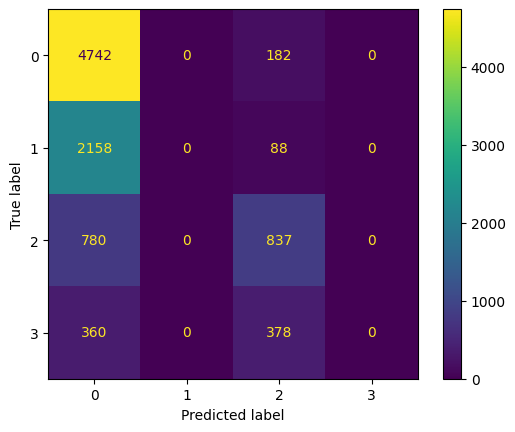

In [88]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
xgb_model = xgb.XGBClassifier(random_state=42)
param_grid={'max_depth':[4,6,9],
            'n_estimators': [100,200,300]}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_xgb_model = grid_search.best_estimator_
y_pred=best_xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(best_xgb_model, X_test, y_test)
plt.show()



for this one i also did a param and grid search but in the param i did n_estimators which estimated the number of trees.